# Jupyter Notebook: Parsing JSON and Visualizing Orbit Path Data

In this notebook, we will load a JSON file, convert it to a pandas DataFrame, and then create visualizations using geopandas.

In [6]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['geopandas'])
await piplite.install(['numpy'])

In [7]:
# Import necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

## Step 1: Read JSON File and Parse Data

In [8]:
# Load JSON data from the file
with open('neo-browse.json', 'r') as file:
    neo_data = json.load(file)

# Extract relevant fields from near_earth_objects
asteroids_data = []
for neo in neo_data['near_earth_objects']:
    for approach in neo['close_approach_data']:
        asteroids_data.append({
            'name': neo['name'],
            'estimated_diameter_miles_min': neo['estimated_diameter']['miles']['estimated_diameter_min'],
            'estimated_diameter_miles_max': neo['estimated_diameter']['miles']['estimated_diameter_max'],
            'close_approach_date': approach['close_approach_date'],
            'relative_velocity_mph': approach['relative_velocity']['miles_per_hour'],
            'miss_distance_miles': approach['miss_distance']['miles'],
            'orbit_id': neo['orbital_data']['orbit_id'],
            'orbital_period': neo['orbital_data']['orbital_period']
        })

# Convert to a Pandas DataFrame
df = pd.DataFrame(asteroids_data)
df.head(15)

,name,estimated_diameter_miles_min,estimated_diameter_miles_max,close_approach_date,relative_velocity_mph,miss_distance_miles,orbit_id,orbital_period
0,433 Eros (A898 PA),13.674327,30.576724,1900-12-27,12478.8132604691,29274494.7651919558,659,643.1551163107046
1,433 Eros (A898 PA),13.674327,30.576724,1907-11-05,9830.0366684463,43827318.620434755,659,643.1551163107046
2,433 Eros (A898 PA),13.674327,30.576724,1917-04-20,10774.6641707501,46408855.985038036,659,643.1551163107046
3,433 Eros (A898 PA),13.674327,30.576724,1924-03-05,10280.915173352,33444243.0636095534,659,643.1551163107046
4,433 Eros (A898 PA),13.674327,30.576724,1931-01-30,13244.2789789347,16181109.5707945148,659,643.1551163107046
5,433 Eros (A898 PA),13.674327,30.576724,1938-01-13,13609.4168237879,19985985.424901343,659,643.1551163107046
6,433 Eros (A898 PA),13.674327,30.576724,1944-11-27,8111.2200388986,37462031.6350747166,659,643.1551163107046
7,433 Eros (A898 PA),13.674327,30.576724,1961-04-04,8294.0593510317,41132212.6021023606,659,643.1551163107046
8,433 Eros (A898 PA),13.674327,30.576724,1968-02-11,13571.014994912,24751473.1315964942,659,643.1551163107046
9,433 Eros (A898 PA),13.674327,30.576724,1975-01-23,13030.6307567732,14048800.5292673654,659,643.1551163107046


## Step 2: Simulate Orbit Paths

In [9]:
def simulate_orbit(orbital_period, num_points=360):
    """Simulate a simple circular orbit."""
    theta = np.linspace(0, 2 * np.pi, num_points)  # angles for orbit

    # Approximate latitude and longitude
    lat = 90 * np.sin(theta)  # Simplified for illustration
    lon = (360 / orbital_period) * theta
    
    # Normalize longitudes to be between -180 and 180 degrees
    lon = (lon + 180) % 360 - 180
    
    return lat, lon

## Step 3: Convert orbital_period to Numeric

In [10]:
# Convert 'orbital_period' column to numeric, forcing any errors to NaN (if there's bad data)
df['orbital_period'] = pd.to_numeric(df['orbital_period'], errors='coerce')

# Drop rows where 'orbital_period' is NaN (if necessary)
df = df.dropna(subset=['orbital_period'])

# Check the DataFrame
df.head(15)

,name,estimated_diameter_miles_min,estimated_diameter_miles_max,close_approach_date,relative_velocity_mph,miss_distance_miles,orbit_id,orbital_period
0,433 Eros (A898 PA),13.674327,30.576724,1900-12-27,12478.8132604691,29274494.7651919558,659,643.155116
1,433 Eros (A898 PA),13.674327,30.576724,1907-11-05,9830.0366684463,43827318.620434755,659,643.155116
2,433 Eros (A898 PA),13.674327,30.576724,1917-04-20,10774.6641707501,46408855.985038036,659,643.155116
3,433 Eros (A898 PA),13.674327,30.576724,1924-03-05,10280.915173352,33444243.0636095534,659,643.155116
4,433 Eros (A898 PA),13.674327,30.576724,1931-01-30,13244.2789789347,16181109.5707945148,659,643.155116
5,433 Eros (A898 PA),13.674327,30.576724,1938-01-13,13609.4168237879,19985985.424901343,659,643.155116
6,433 Eros (A898 PA),13.674327,30.576724,1944-11-27,8111.2200388986,37462031.6350747166,659,643.155116
7,433 Eros (A898 PA),13.674327,30.576724,1961-04-04,8294.0593510317,41132212.6021023606,659,643.155116
8,433 Eros (A898 PA),13.674327,30.576724,1968-02-11,13571.014994912,24751473.1315964942,659,643.155116
9,433 Eros (A898 PA),13.674327,30.576724,1975-01-23,13030.6307567732,14048800.5292673654,659,643.155116


## Step 4: Plot the Orbits on a Global Map

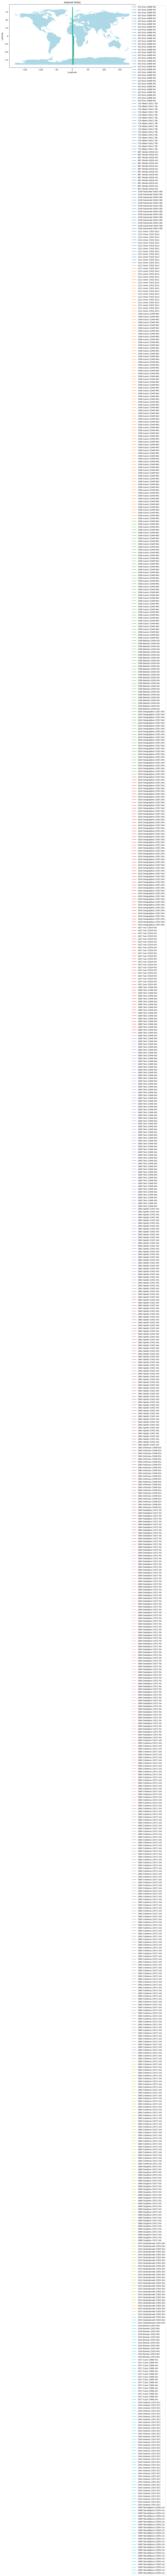

In [11]:
# Simulate and plot the orbits
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightblue')

colors = plt.cm.get_cmap('tab10', len(df))

for idx, row in df.iterrows():
    lat, lon = simulate_orbit(row['orbital_period'])
    ax.plot(lon, lat, label=row['name'], color=colors(idx))

# Customize the plot
ax.set_title("Asteroid Orbits")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()